In [3]:
#importing the libraries
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [4]:
#reading the dataset from keras since it is already available there
tf.keras.datasets.mnist.load_data(path="mnist.npz")

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [5]:
#splitted the dataset into train and test
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


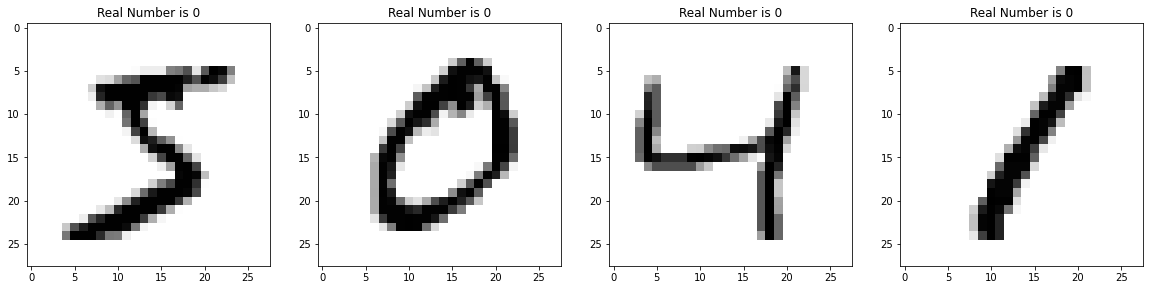

In [6]:
#Reshaping the datset and plotting it as a greyscale image
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_train[i], cmap='binary')
    digit = y_train[i].argmax()
    ax.set(title = f"Real Number is {digit}");

In [7]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
#simple CNN model
batch_size = 128
num_classes = 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adadelta(),metrics=['accuracy'])

In [9]:
#fitting the model with 80per as train and 20per as test
model.fit(x_train, y_train, batch_size=batch_size, validation_split=0.2, epochs=15)

Epoch 1/15
375/375 [==============================] - 109s 286ms/step - loss: 0.6617 - accuracy: 0.1130 - val_loss: 0.6147 - val_accuracy: 0.1081
Epoch 2/15
375/375 [==============================] - 100s 267ms/step - loss: 0.5683 - accuracy: 0.1221 - val_loss: 0.5037 - val_accuracy: 0.1077
Epoch 3/15
375/375 [==============================] - 98s 262ms/step - loss: 0.4591 - accuracy: 0.1296 - val_loss: 0.3975 - val_accuracy: 0.1076
Epoch 4/15
375/375 [==============================] - 99s 263ms/step - loss: 0.3843 - accuracy: 0.1388 - val_loss: 0.3451 - val_accuracy: 0.1437
Epoch 5/15
375/375 [==============================] - 97s 260ms/step - loss: 0.3539 - accuracy: 0.1547 - val_loss: 0.3258 - val_accuracy: 0.2862
Epoch 6/15
375/375 [==============================] - 98s 262ms/step - loss: 0.3417 - accuracy: 0.1719 - val_loss: 0.3164 - val_accuracy: 0.3840
Epoch 7/15
375/375 [==============================] - 98s 260ms/step - loss: 0.3351 - accuracy: 0.1894 - val_loss: 0.3095 - val_

In [71]:
# saving model as model.h5
model.save('model.h5')

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2359552   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

In [12]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print("Test Loss",test_loss,"\nTest Accuracy",test_acc)

313/313 [==============================] - 8s 26ms/step - loss: 0.2582 - accuracy: 0.7132
Test Loss 0.2582494020462036 
Test Accuracy 0.7131999731063843


In [73]:
# make a prediction for a new image.
from numpy import argmax
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(path):
    # load the image
    img = load_img(path, grayscale=True, target_size=(28, 28))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    model = load_model('model.h5')
    predict_value = model.predict(img)
    digit = np.argmax(predict_value)
    
    #storing the filename in a list
    if len(store)==0:
        store.append(path)
    
    elif len(store) != 0:
        for i in range(0,len(store)):
            filename = path
            if store[i] == filename:
                answer = print("Image predicted Before") 
                    # predict the digit
            elif store[i] != filename:
                answer =  digit
    
    return digit
print("\nsample_image",load_image("sample_image.png"))

Image predicted Before

sample_image 7


In [75]:
print("\nOIP (1)",load_image("OIP (1).jpg"))
print("\nsample_image",load_image("sample_image.png"))


OIP (1) 0
Image predicted Before

sample_image 7
